In [10]:
!mkdir -p images

!wget -O images/image1.jpg https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg
!wget -O images/image2.jpg https://www.topmarkfunding.com/wp-content/uploads/2019/10/what-is-a-semi-truck.jpg
!wget -O images/image3.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Dickcissel_%28257310149%29.jpeg/1200px-Dickcissel_%28257310149%29.jpeg
!wget -O images/image4.jpg https://www.kayak.com/news/wp-content/uploads/sites/19/2022/10/theme_person_surfing_beach_ocean_senior_tattoos-shutterstock-portfolio_1578766012_universal_within-usage-period_80728.jpg
!wget -O images/image5.jpg https://www.commercialcafe.com/blog/wp-content/uploads/sites/10/lower_manhattan_skyline_low_altitude_aerial_battery_park_skyscrapers.jpg

--2024-11-05 04:10:35--  https://upload.wikimedia.org/wikipedia/commons/6/6e/Golde33443.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212652 (208K) [image/jpeg]
Saving to: ‘images/image1.jpg’

images/image1.jpg   100%[===================>] 207.67K  1.19MB/s    in 0.2s    

2024-11-05 04:10:36 (1.19 MB/s) - ‘images/image1.jpg’ saved [212652/212652]

--2024-11-05 04:10:36--  https://www.topmarkfunding.com/wp-content/uploads/2019/10/what-is-a-semi-truck.jpg
Resolving www.topmarkfunding.com (www.topmarkfunding.com)... 192.124.249.177
Connecting to www.topmarkfunding.com (www.topmarkfunding.com)|192.124.249.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207077 (202K) [image/jpeg]
Saving to: ‘images/image2.jpg’

images/image2.jpg   100%[===================>] 202.22K

In [11]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def load_image(image_path):
    img = Image.open(image_path).convert('RGB').resize((64, 64))
    img = np.array(img) / 255.0
    return torch.tensor(img).permute(2, 0, 1).float()

In [13]:
def load_image(image_path):
    img = Image.open(image_path).convert('RGB').resize((64, 64))
    img = np.array(img) / 255.0
    return torch.tensor(img).permute(2, 0, 1).float()

image_paths = [
    'images/image1.jpg',
    'images/image2.jpg',
    'images/image3.jpg',
    'images/image4.jpg',
    'images/image5.jpg'
]

clean_images = [load_image(img_path) for img_path in image_paths]
clean_images = torch.stack(clean_images)

In [14]:
def get_variance_schedule(T, start=1e-4, end=0.02):
    return torch.linspace(start, end, T)

def forward_diffusion(x_0, t, beta):
    """
    x_0: Original clean image
    t: Time step
    beta: Variance schedule (noise level at each time step)
    """
    noise = torch.randn_like(x_0)
    alpha_t = torch.cumprod(1 - beta, dim=0)
    x_t = torch.sqrt(alpha_t[t]) * x_0 + torch.sqrt(1 - alpha_t[t]) * noise
    return x_t
T = 500
beta = get_variance_schedule(T)


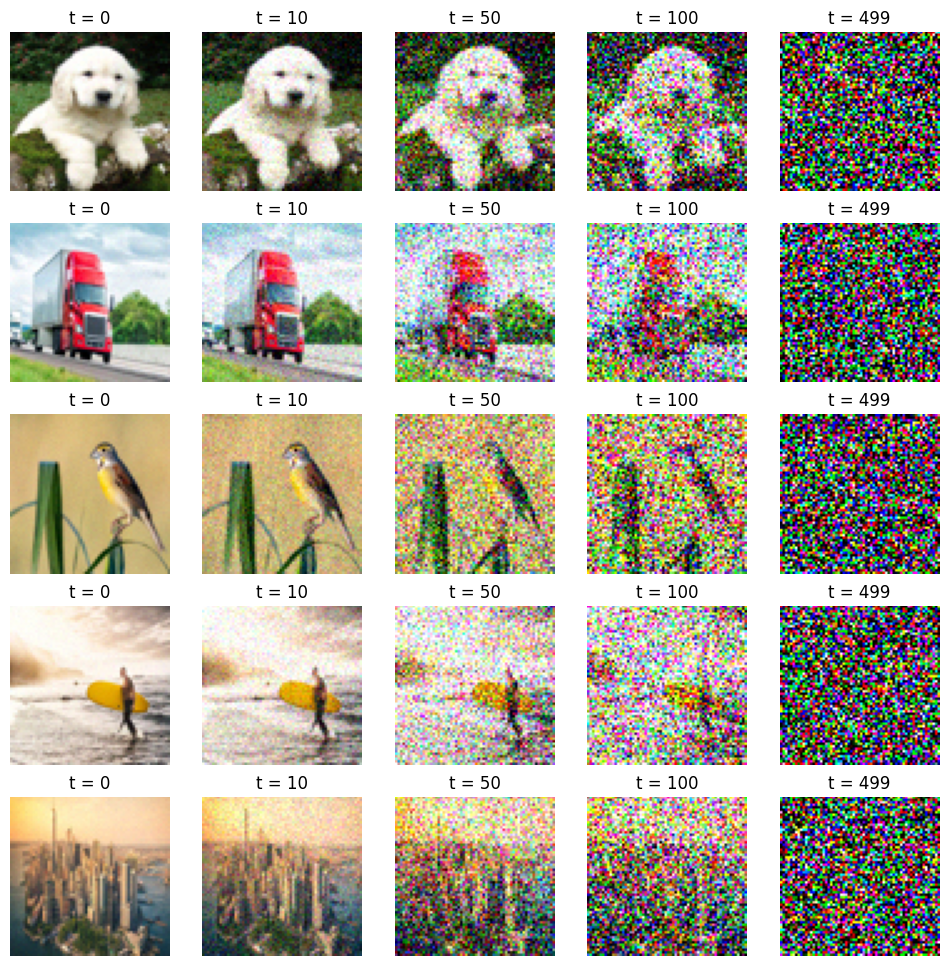

In [15]:

time_steps_to_plot = [0, 10, 50, 100, 499]

def plot_images(clean_images, time_steps_to_plot, beta):
    fig, axes = plt.subplots(len(clean_images), len(time_steps_to_plot), figsize=(12, 12))

    for i, img in enumerate(clean_images):
        for j, t in enumerate(time_steps_to_plot):
            noisy_img = forward_diffusion(img, t, beta)
            noisy_img = noisy_img.permute(1, 2, 0).numpy()

            axes[i, j].imshow(noisy_img)
            axes[i, j].axis('off')
            axes[i, j].set_title(f't = {t}')

    plt.show()

plot_images(clean_images, time_steps_to_plot, beta)


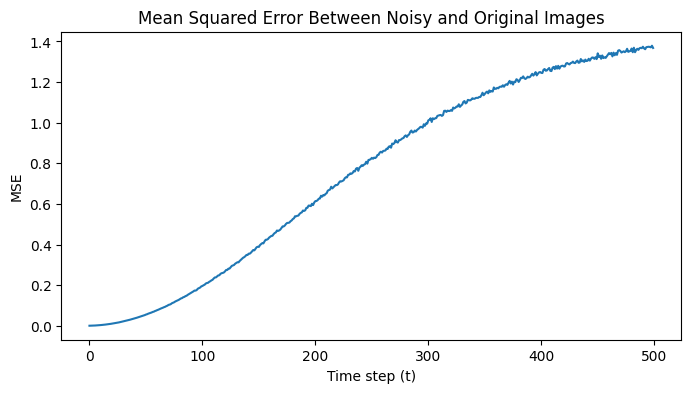

In [16]:
def calculate_mse(clean_images, beta):
    mse_values = []

    for t in range(T):
        noisy_images = forward_diffusion(clean_images, t, beta)
        mse = torch.mean((noisy_images - clean_images) ** 2)
        mse_values.append(mse.item())

    return mse_values

mse_values = calculate_mse(clean_images, beta)

plt.figure(figsize=(8, 4))
plt.plot(range(T), mse_values)
plt.xlabel('Time step (t)')
plt.ylabel('MSE')
plt.title('Mean Squared Error Between Noisy and Original Images')
plt.show()
